## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman1Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np

## Parameters 

In [3]:
variance = 1

In [4]:
# Parameters
variance = 0.1


## Dataset - California Dataset


In [5]:
#Parameters 
n_features = 5
n_samples= 100
n_target = 1 

In [6]:
X,Y = friedman1Dataset.friedman1_data(n_samples,n_features)

         X0        X1        X2        X3        X4         Y
0  0.315612 -1.561672 -0.237004 -0.524522  1.204513 -0.949355
1 -1.501275  1.287415 -0.525758  1.189083  1.065293 -0.288120
2  1.739650 -0.255570  0.729183 -1.242589 -1.206846 -0.363898
3  0.065281  1.924575 -1.757500 -0.371818  0.736087  1.708469
4 -1.126895  0.654624  0.502524 -0.903087 -0.383997 -1.546655


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.027471
0:	learn: 0.9623917	total: 46.4ms	remaining: 46.4s
1:	learn: 0.9525120	total: 46.8ms	remaining: 23.3s
2:	learn: 0.9431447	total: 47.1ms	remaining: 15.7s
3:	learn: 0.9327997	total: 47.5ms	remaining: 11.8s
4:	learn: 0.9232284	total: 47.9ms	remaining: 9.53s
5:	learn: 0.9142098	total: 48.2ms	remaining: 7.99s
6:	learn: 0.9030044	total: 48.6ms	remaining: 6.89s
7:	learn: 0.8939701	total: 48.9ms	remaining: 6.07s
8:	learn: 0.8848493	total: 49.3ms	remaining: 5.43s
9:	learn: 0.8766120	total: 49.7ms	remaining: 4.92s
10:	learn: 0.8673703	total: 50ms	remaining: 4.49s
11:	learn: 0.8583994	total: 50.3ms	remaining: 4.14s
12:	learn: 0.8497789	total: 50.7ms	remaining: 3.85s
13:	learn: 0.8411078	total: 51ms	remaining: 3.59s
14:	learn: 0.8332840	total: 51.4ms	remaining: 3.38s
15:	learn: 0.8251282	total: 51.7ms	remaining: 3.18s
16:	learn: 0.8157894	total: 52.1ms	remaining: 3.01s
17:	learn: 0.8080991	total: 52.5ms	remaining: 2.86s
18:	learn: 0.8001572	total: 52.8ms	remaining: 2.

206:	learn: 0.1694687	total: 121ms	remaining: 465ms
207:	learn: 0.1680648	total: 122ms	remaining: 464ms
208:	learn: 0.1669526	total: 122ms	remaining: 462ms
209:	learn: 0.1656358	total: 123ms	remaining: 461ms
210:	learn: 0.1644152	total: 123ms	remaining: 459ms
211:	learn: 0.1631765	total: 123ms	remaining: 458ms
212:	learn: 0.1620162	total: 124ms	remaining: 457ms
213:	learn: 0.1607775	total: 124ms	remaining: 455ms
214:	learn: 0.1596001	total: 124ms	remaining: 454ms
215:	learn: 0.1585272	total: 125ms	remaining: 453ms
216:	learn: 0.1571722	total: 125ms	remaining: 451ms
217:	learn: 0.1560023	total: 125ms	remaining: 450ms
218:	learn: 0.1548823	total: 126ms	remaining: 449ms
219:	learn: 0.1537820	total: 126ms	remaining: 447ms
220:	learn: 0.1525917	total: 127ms	remaining: 446ms
221:	learn: 0.1513577	total: 127ms	remaining: 445ms
222:	learn: 0.1502004	total: 127ms	remaining: 444ms
223:	learn: 0.1489321	total: 128ms	remaining: 443ms
224:	learn: 0.1479173	total: 128ms	remaining: 441ms
225:	learn: 

492:	learn: 0.0366100	total: 225ms	remaining: 232ms
493:	learn: 0.0364959	total: 226ms	remaining: 231ms
494:	learn: 0.0363842	total: 226ms	remaining: 231ms
495:	learn: 0.0361306	total: 227ms	remaining: 230ms
496:	learn: 0.0360029	total: 227ms	remaining: 230ms
497:	learn: 0.0357475	total: 227ms	remaining: 229ms
498:	learn: 0.0354990	total: 228ms	remaining: 229ms
499:	learn: 0.0353472	total: 228ms	remaining: 228ms
500:	learn: 0.0351057	total: 229ms	remaining: 228ms
501:	learn: 0.0349573	total: 229ms	remaining: 227ms
502:	learn: 0.0347227	total: 229ms	remaining: 226ms
503:	learn: 0.0345695	total: 230ms	remaining: 226ms
504:	learn: 0.0343904	total: 230ms	remaining: 225ms
505:	learn: 0.0342859	total: 230ms	remaining: 225ms
506:	learn: 0.0341831	total: 231ms	remaining: 224ms
507:	learn: 0.0340350	total: 231ms	remaining: 224ms
508:	learn: 0.0339345	total: 231ms	remaining: 223ms
509:	learn: 0.0337901	total: 232ms	remaining: 223ms
510:	learn: 0.0336892	total: 232ms	remaining: 222ms
511:	learn: 

778:	learn: 0.0126926	total: 329ms	remaining: 93.3ms
779:	learn: 0.0126248	total: 329ms	remaining: 92.9ms
780:	learn: 0.0125991	total: 330ms	remaining: 92.5ms
781:	learn: 0.0125576	total: 330ms	remaining: 92.1ms
782:	learn: 0.0124912	total: 331ms	remaining: 91.6ms
783:	learn: 0.0124615	total: 331ms	remaining: 91.2ms
784:	learn: 0.0124154	total: 332ms	remaining: 90.8ms
785:	learn: 0.0124065	total: 332ms	remaining: 90.4ms
786:	learn: 0.0123419	total: 332ms	remaining: 89.9ms
787:	learn: 0.0123331	total: 333ms	remaining: 89.5ms
788:	learn: 0.0122928	total: 333ms	remaining: 89ms
789:	learn: 0.0122295	total: 333ms	remaining: 88.6ms
790:	learn: 0.0122208	total: 334ms	remaining: 88.2ms
791:	learn: 0.0121589	total: 334ms	remaining: 87.7ms
792:	learn: 0.0121343	total: 334ms	remaining: 87.3ms
793:	learn: 0.0120802	total: 335ms	remaining: 86.8ms
794:	learn: 0.0120374	total: 335ms	remaining: 86.4ms
795:	learn: 0.0120288	total: 335ms	remaining: 86ms
796:	learn: 0.0120047	total: 336ms	remaining: 85.5

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape)
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)

# ABC GAN Model

### Training the network
**Training ABC-GAN for n_epochs number of epochs** 

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

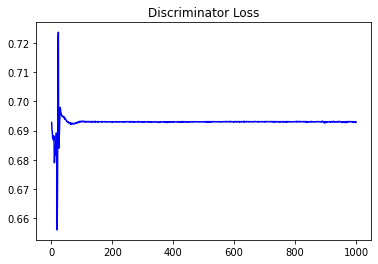

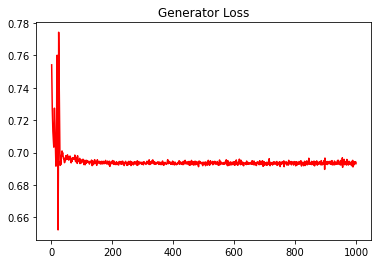

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.09565629057740854


#### Sanity Checks 

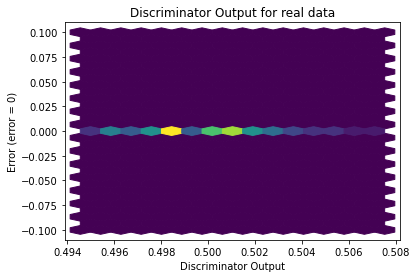

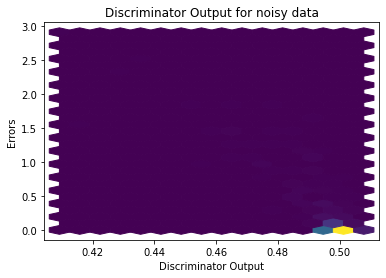

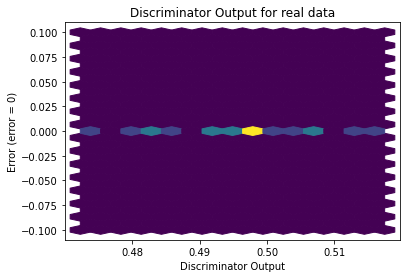

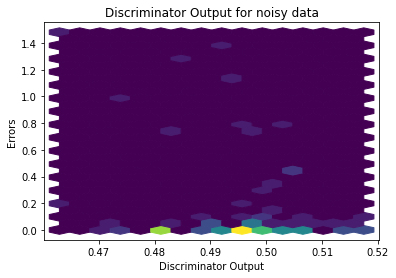

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


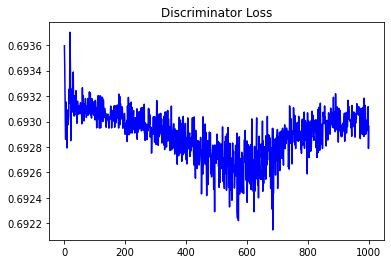

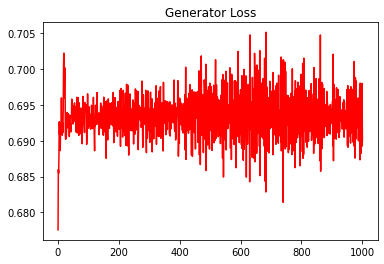

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.09026023367956482


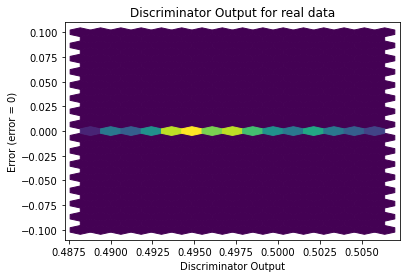

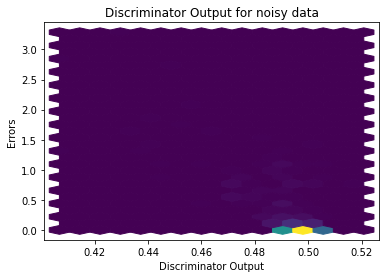

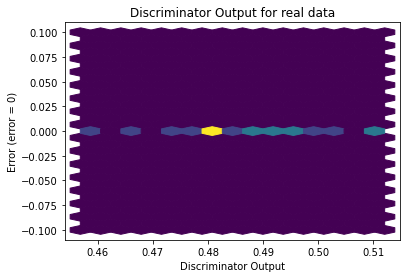

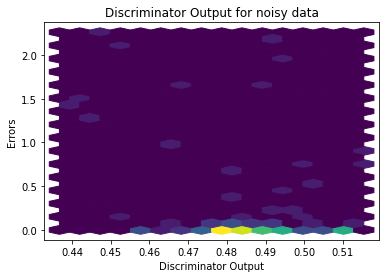

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.2097]], device='cuda:0', requires_grad=True)
